In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'hvplot'

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [ ]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [ ]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file


In [ ]:
df = pd.read_csv('Resources/crypto_market_data.csv')
scaler = StandardScaler()

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaled_data = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)

# Copy the crypto names from the original DataFrame
df_scaled ['coin_id'] = df['coin_id']

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [ ]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))

In [ ]:
# Create an empty list to store the inertia values

inertia = []
# Create a for loop to compute the inertia with each possible value of k
elbow_data ={
    'k' : k_values, 
    'inertia' : inertia
}
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data_scaled)
    
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

NameError: name 'df_market_data_scaled' is not defined

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k' : k_values,
    'inertia' : inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

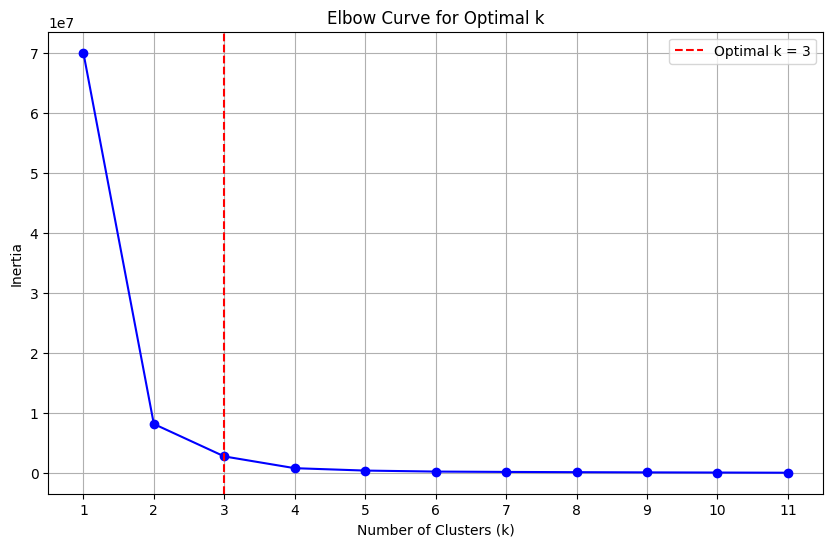

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(df_elbow['k'])  
plt.grid(True)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal k = 3') 
plt.legend()
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
k=3

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [ ]:
# Initialize the K-Means model using the best value for k
best_k = 3 
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [ ]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_elbow)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predictions_df = kmeans_model.predict(df_elbow)

# Print the resulting array of cluster values.
print(predictions_df)

[1 2 0 0 0 0 0 0 0 0 0]


In [ ]:
# Create a copy of the scaled DataFrame
predictions_df_copy = predictions_df.copy()

In [ ]:
predicted_cluster = "predicted_cluster"

#predictions_df{f"predicted_cluster"} = predictions_df


In [ ]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
predicted_clusters = "predicted_clusters"
#predictions_df['predicted_clusters'] = predictions_df
predictions_df_copy[f"{predicted_clusters}"]= predictions_df.copy()
# Display the copy of the scaled DataFrame
print(predictions_df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = predictions_df_copy.hvplot.scatter(
    x="price_change_percentage_24h",  
    y="price_change_percentage_7d",   
    by="Predicted_Clusters",         
    hover_cols=["crypto_name"],         
    title="Cryptocurrency Price Changes" 
)

# Display the scatter plot
scatter_plot


---

### Optimize Clusters with Principal Component Analysis.

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [ ]:

from sklearn.decomposition import PCA
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)


In [ ]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
customers_pca = pca.fit_transform(df_market_data)

# View the scaled PCA data
df_market_data[:5]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [ ]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([9.76037313e-01, 2.30282949e-02, 7.48308214e-04])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaled_data = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=numerical_columns)

# Copy the crypto names from the original DataFrame
df_scaled ['coin_id'] = df['coin_id']

# Set the coin_id column as index
df_scaled.set_index('coin_id', inplace=True)

In [ ]:
predicted_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaled_data = scaler.fit_transform(df[numerical_columns])

# Create a new DataFrame with the PCA data.

df_market_data_pca = pd.DataFrame(df_market_data, columns="")
# Copy the crypto names from the original scaled DataFrame

df_market_data_pca.set_index ['coin_id'] = df['coin_id']
# Set the coin_id column as index

df_market_data_pca.set_index('coin_id', inplace=True)
# Display the scaled PCA DataFrame
print(df_market_data_pca.head())

TypeError: Index(...) must be called with a collection of some kind, '' was passed

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [ ]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [ ]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_pca)
    inertia.append(k_model.inertia_)

NameError: name 'df_market_data_pca' is not defined

In [ ]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

ValueError: All arrays must be of the same length

In [ ]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [ ]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

In [ ]:
# Initialize the K-Means model using the best value for k
best_k = 3 
kmeans_model = KMeans(n_clusters=best_k, random_state=0)

In [ ]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_elbow)

In [ ]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
predictions_df = kmeans_model.predict(df_elbow)

# Print the resulting array of cluster values.
print(predictions_df)

In [ ]:
# Create a copy of the scaled PCA DataFrame

predictions_df_copy = predictions_df.copy()
# Add a new column to the copy of the PCA DataFrame with the predicted clusters
predictions_df_copy['Predicted_Clusters'] = predicted_clusters  

# Display the copy of the scaled PCA DataFrame
print(predictions_df_copy)

In [ ]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
ccinfo_pca_predictions_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="customer_segments"
)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 